# Stocks Data Analysis and Visualization Solution

**Problem Statement:**
For Investors to properly manage their portfolios, they need to visualize datasets, find
useful patterns and gain valuable insights such as stock daily returns and risks.
In this project we will use the power of python to perform stock data visualization and
stock return calculation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Dataset:** 
The Dataset contains stock prices of certain companies listed in S&P 500. S&P 500 is
a stock market index that measures the stock performance of 500 large companies
listed on U.S. stock exchange.

**Below is the list of stocks considered:**  
AAPL = Apple Stock  
BA = Boeing  
T = AT&T  
MGM = MGM Resorts International (Hotel Industry)  
AMZN = Amazon  
IBM = IBM  
TSLA = Tesla Motors  
GOOG = Google

### 1)How do you read the data from stock.csv file using pandas module?

In [2]:
df=pd.read_csv('stock1.csv')
df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [3]:
#Data analysis
df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0 2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1 2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2 2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3 2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4 2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [7]:
df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

### 2) Print out the number of stocks.

In [8]:
print(len(df.columns)-2)

8


### 3) Print the name of stocks.

In [9]:
for i in range(1,len(df.columns)-1):
    print(df.columns[i])


AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG


### 4)What is the average return of the S&P500?

In [10]:
df["sp500"].mean()

2218.7495540592868

### 5)Which stock or index has the minimum dispertion from the mean in dollar value?

In [11]:
stds=df.std().to_dict()
stds.pop('Date')
temp = min(stds.values())
res = [key for key in stds if stds[key] == temp]
print("%s $%f" % (res, temp))

['T'] $3.207490


AT & T has the minimum dispersion from the mean

### 6)What is the maximum price for AMZN stock over the specified time period?

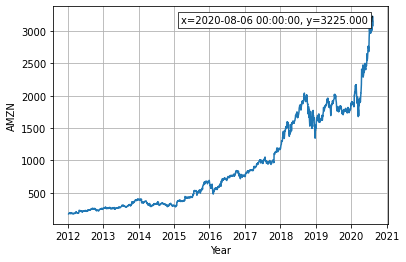

In [12]:

def norm_plt(df,column):
    plt.plot(df.Date, df[column])

    def annot_max(x,y, ax=None):
        xmax = x[np.argmax(y)]
        ymax = y.max()
        text= "x={}, y={:.3f}".format(xmax, ymax)
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

    annot_max(df.Date,df[column])

    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

norm_plt(df,"AMZN")

### 7)Check if data contains any null values.

In [13]:
df.isnull().any().sum()

0

### 8)Get dataframe information.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2159 non-null   datetime64[ns]
 1   AAPL    2159 non-null   float64       
 2   BA      2159 non-null   float64       
 3   T       2159 non-null   float64       
 4   MGM     2159 non-null   float64       
 5   AMZN    2159 non-null   float64       
 6   IBM     2159 non-null   float64       
 7   TSLA    2159 non-null   float64       
 8   GOOG    2159 non-null   float64       
 9   sp500   2159 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 168.8 KB


### 9)Define a function to plot RAW STOCK PRICES (WITHOUT NORMALIZATION/WITHOUT SCALING).

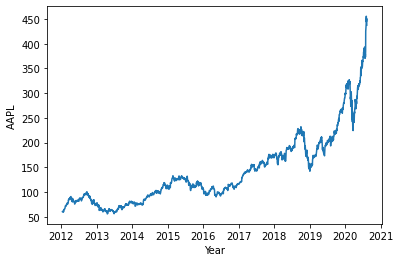

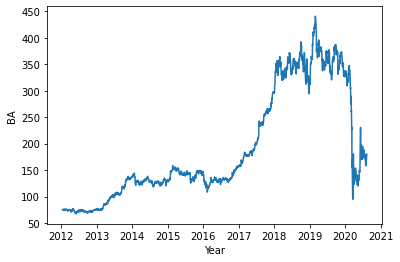

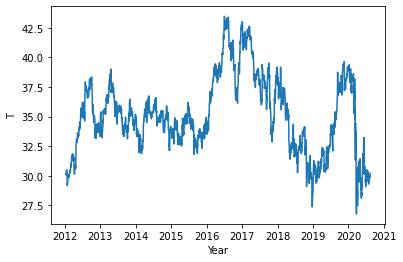

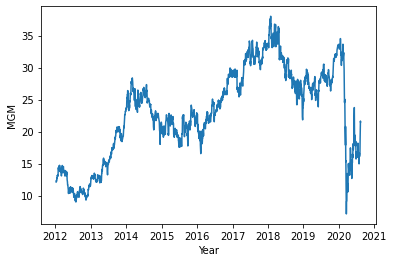

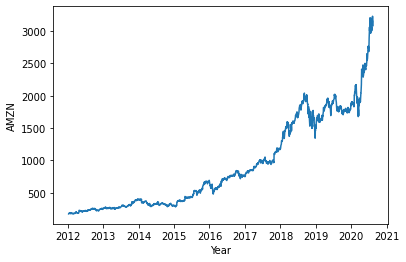

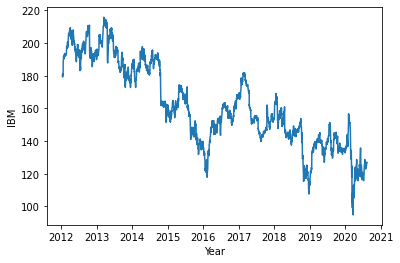

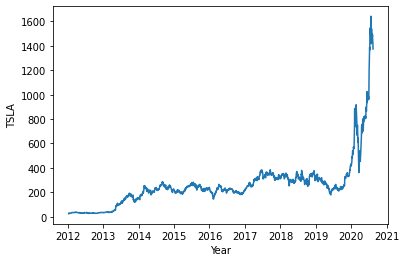

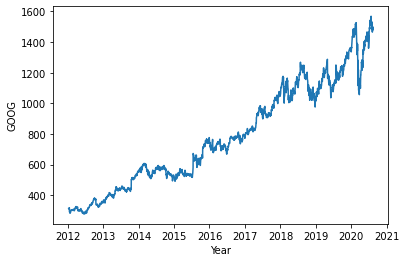

In [15]:
def dfPlot(df):
    x=df.Date
    
    for i in range(1,9):
        fig, axs = plt.subplots()
        y=df.columns[i]
        axs=plt.plot(x,df[y])
        plt.xlabel("Year")
        plt.ylabel(df.columns[i])
        
dfPlot(df)

In [16]:
df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0 2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1 2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2 2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3 2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4 2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

### 10)Plot Normalized/Scaled stock prices.

In [17]:
def normal(df):
    df_new=df
    df_new=df.set_index(['Date'])
    firsts = (df_new.groupby(level=['Date']).transform('first').iloc[0])
    result = df_new / firsts
    return result
norm_df=normal(df)
norm_df.reset_index(inplace=True)
norm_df.head()

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0 2012-01-12  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1 2012-01-13  0.996251  0.987949  0.998340  1.018137  1.014153  0.992301   
2 2012-01-17  1.007855  0.996424  1.004316  1.009893  1.032570  0.996954   
3 2012-01-18  1.018320  0.994040  1.006972  1.049464  1.076792  1.002880   
4 2012-01-19  1.015093  1.000662  1.009960  1.055235  1.105269  0.999834   

       TSLA      GOOG     sp500  
0  1.000000  1.000000  1.000000  
1  0.806726  0.992615  0.995052  
2  0.941593  0.998317  0.998587  
3  0.949027  1.005193  1.009680  
4  0.947257  1.015771  1.014666

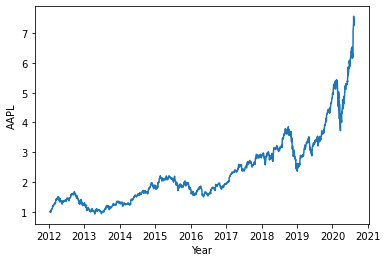

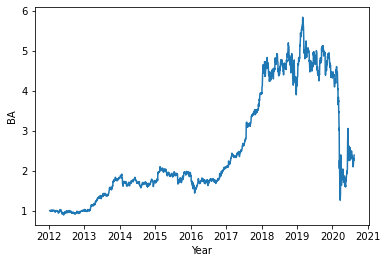

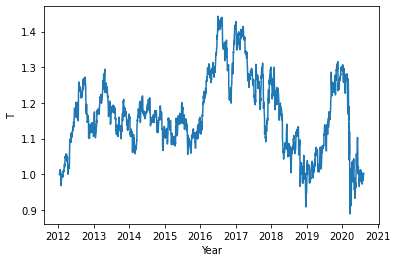

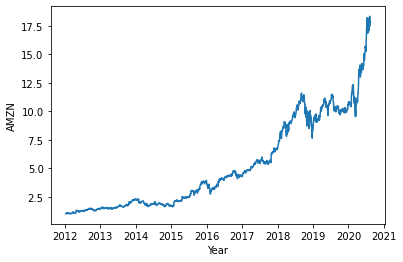

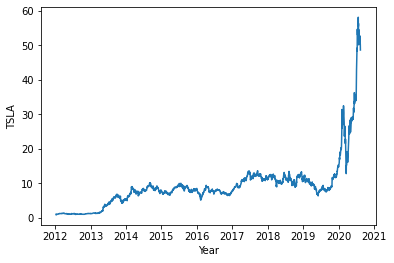

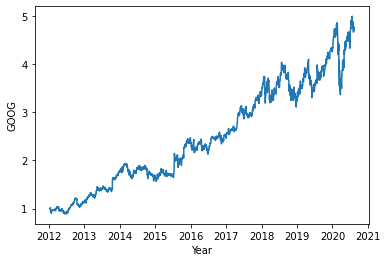

In [18]:
dfPlot(norm_df)

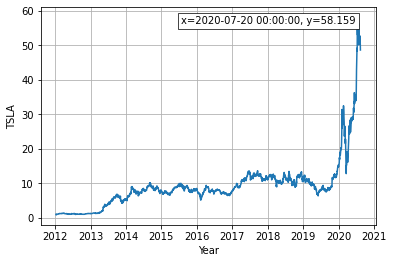

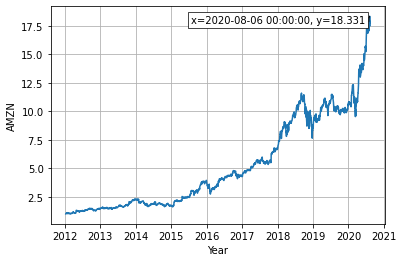

In [23]:
norm_plt(norm_df,"TSLA")
norm_plt(norm_df,"AMZN")

### 11)Perform Interactive Data visualization using Plotly.

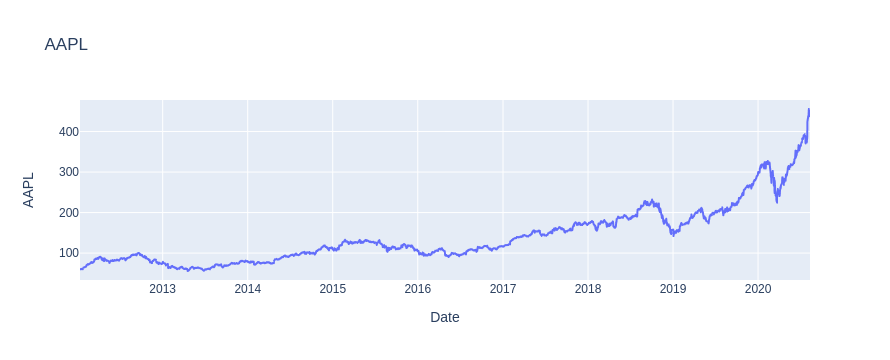

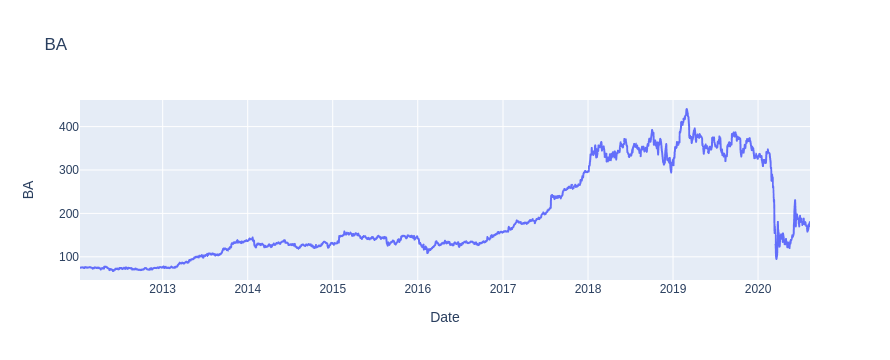

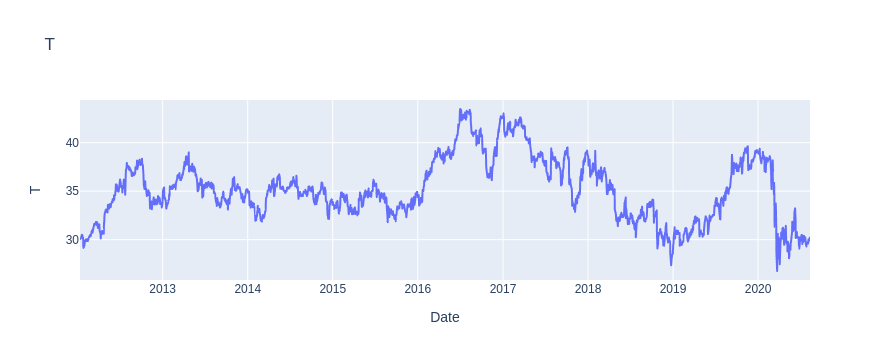

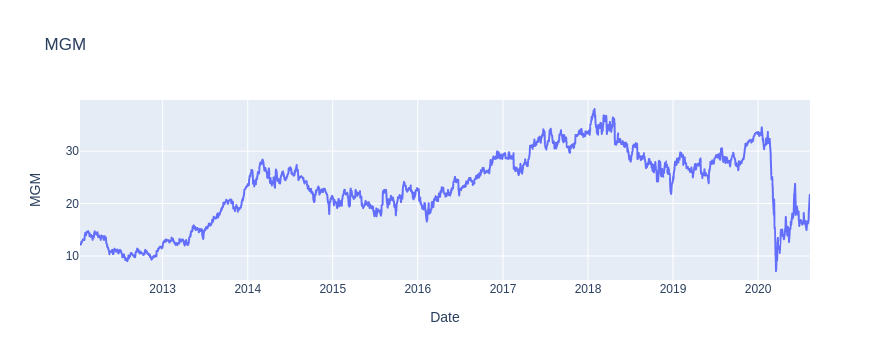

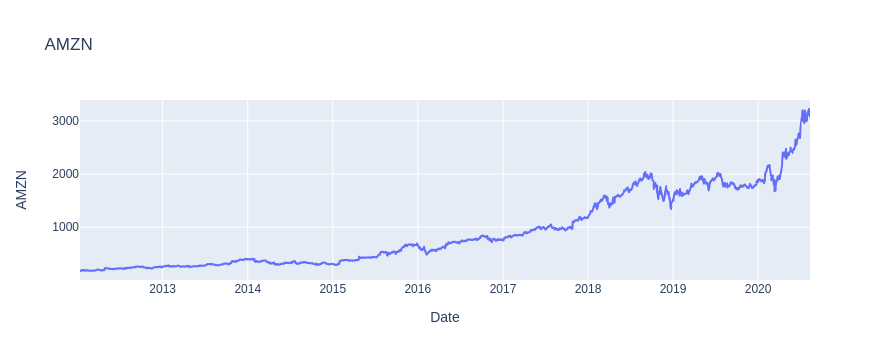

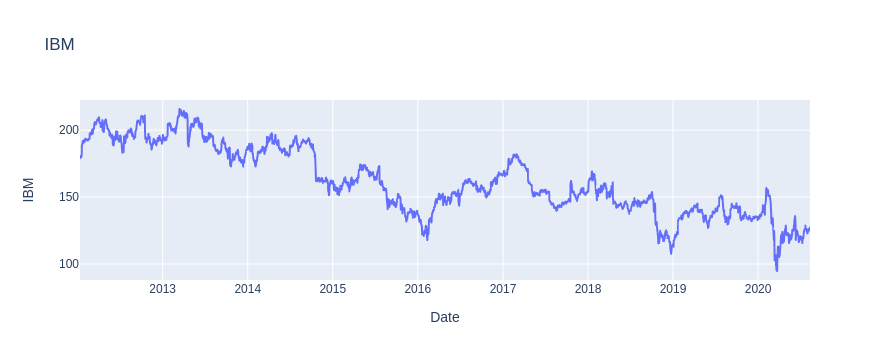

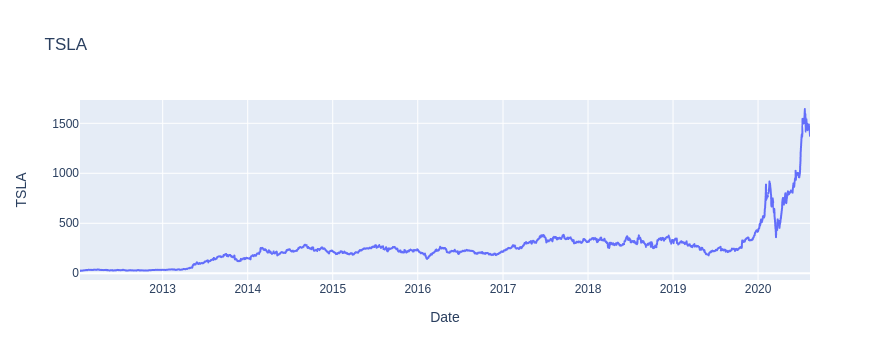

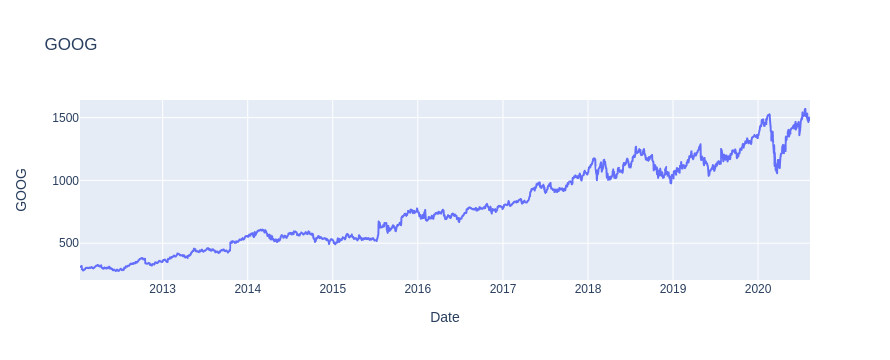

In [26]:
import plotly.express as px
for i in range(1,9):
    column=df.columns[i]
    fig = px.line(df, x="Date", y=column, title=column)
    fig.show()

### 12) SimilarlyPlot normalized stock data in an interactive way.

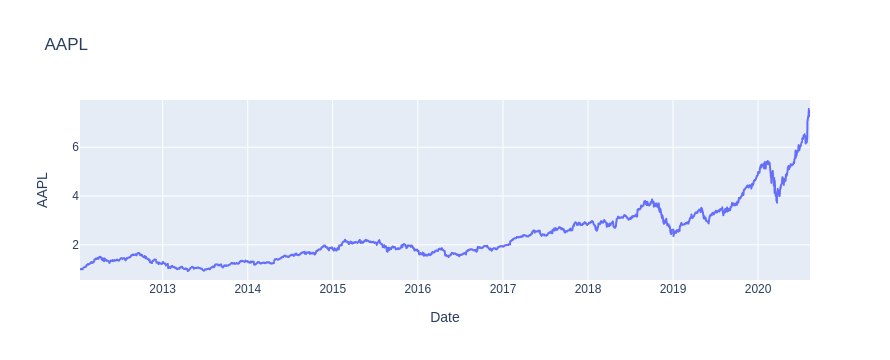

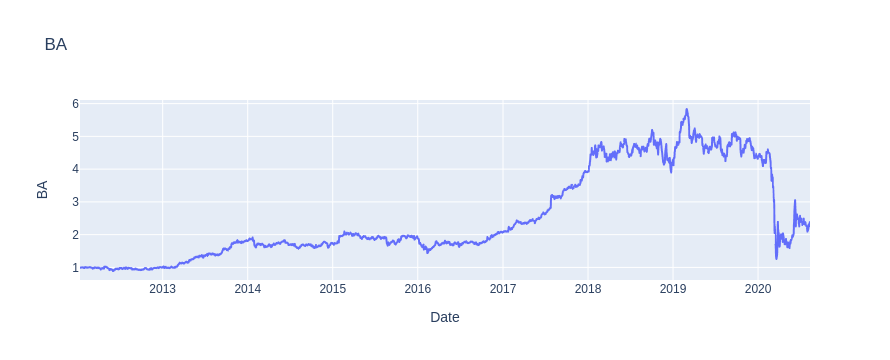

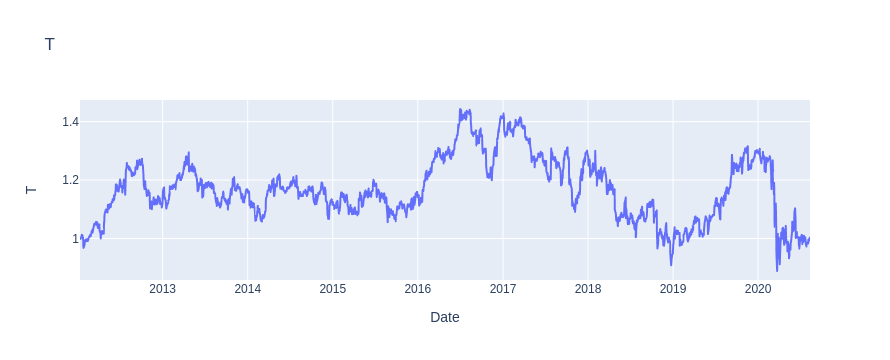

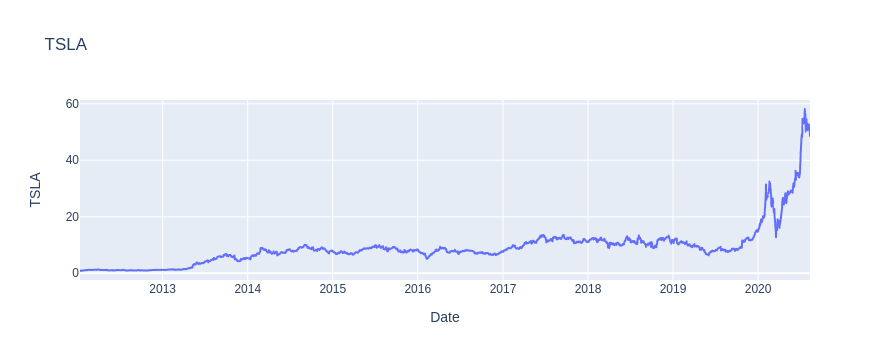

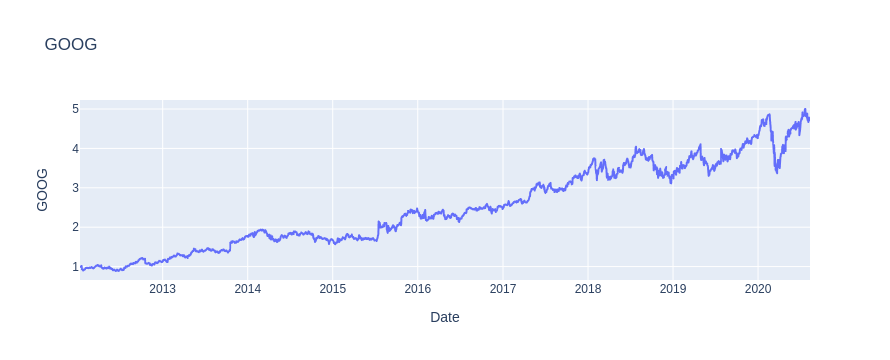

In [27]:
for i in range(1,9):
    column=norm_df.columns[i]
    fig = px.line(norm_df, x="Date", y=column, title=column)
    fig.show()

In [28]:
df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0 2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1 2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2 2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3 2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4 2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

### 13) It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in \\$) by March 23rd, 2020?

In [38]:
x=df.loc[df['Date'] == "2020-02-19", 'sp500'].values[0]
y=df.loc[df['Date'] == "2020-03-23", 'sp500'].values[0]
print("$",x-y)

$ 1148.75


In [39]:
print(x,y)

3386.149902 2237.399902


### 14) Calculate the daily return for S&P 500.

In [40]:
for i in df['sp500']:
    df_daily_return[i] = ((df[i]- df[i-1])/df[i-1]) * 100

KeyError: 1295.5

In [43]:
for i in df['sp500']

KeyError: 1295.5